# Sprint 4: S04 T01: Transformació Registre Log amb Regular expressions

## Nivell 1
### Exercici 1
#### Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import json
import warnings

warnings.filterwarnings('ignore')

In [246]:
data = pd.read_fwf(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint4\Sprint4Ex1\Web_access_log-akumenius.com.txt\Web_access_log-akumenius.com.txt", header=None)
data

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


###### Para realizar la conversión del archivo he utilizado una Regular Expression que estaba definida en la libreria de regex previamente por otro usuario.
###### Se ha verificado que la expresión definida coincidía con un registro aleatorio de la lectura de "data" y renombrado alguno de los campos

https://regex101.com/r/HD415R/1

In [247]:
regex = r'^(?P<hostTitle>.*?[A-Za-z\.]*) (?P<ip>[0-9\.]*) - - \[(?P<dateTime>.*)\] "(?P<request>[A-Z]*) (?P<requested>[^ ]*) (?P<protocol>[^"]*)" (?P<code>[0-9]*) (?P<code2>[0-9]*)[^"]*"(?P<code_body>[^"]*)" "(?P<userAccess>[^"]*)" VLOG=-$'

In [248]:
dataRegEx = data[0].str.extract(regex, flags=re.MULTILINE)
dataRegEx

,hostTitle,ip,dateTime,request,requested,protocol,code,code2,code_body,userAccess
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,GET,/,HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,HEAD,/,HTTP/1.1,200,,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)


In [249]:
dataRegEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hostTitle   171674 non-null  object
 1   ip          171674 non-null  object
 2   dateTime    171674 non-null  object
 3   request     171674 non-null  object
 4   requested   171674 non-null  object
 5   protocol    171674 non-null  object
 6   code        171674 non-null  object
 7   code2       171674 non-null  object
 8   code_body   171674 non-null  object
 9   userAccess  171674 non-null  object
dtypes: object(10)
memory usage: 20.0+ MB


## Nivell II
### Exercici 2
#### Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

##### Modificamos el Formato con datatime y pasamos el mes a númérico para facilitar los cálculos entre diferente fechas

In [250]:
from datetime import datetime
dataRegEx['dateTime'] = pd.to_datetime(dataRegEx['dateTime'], format="%d/%b/%Y:%H:%M:%S %z")
dataRegEx

,hostTitle,ip,dateTime,request,requested,protocol,code,code2,code_body,userAccess
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,GET,/,HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,HEAD,/,HTTP/1.1,200,,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)


In [251]:
dataRegEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype                               
---  ------      --------------   -----                               
 0   hostTitle   171674 non-null  object                              
 1   ip          171674 non-null  object                              
 2   dateTime    171674 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   request     171674 non-null  object                              
 4   requested   171674 non-null  object                              
 5   protocol    171674 non-null  object                              
 6   code        171674 non-null  object                              
 7   code2       171674 non-null  object                              
 8   code_body   171674 non-null  object                              
 9   userAccess  171674 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffs

In [252]:
print("Periodo temporal del Data Frame de: ", dataRegEx.dateTime.min(),"a ", dataRegEx.dateTime.max())

Periodo temporal del Data Frame de:  2014-02-23 03:10:31+01:00 a  2014-03-02 03:10:18+01:00


### Exercici 3
#### 3.1 Geolocalitza les IP's.

##### 3.1.1 Agrupamos las ip por número de visitas

In [253]:
ipNumVisits = dataRegEx["ip"].value_counts().rename_axis("ip").reset_index(name = "NumVisits")
ipNumVisits

,ip,NumVisits
0,66.249.76.216,45500
1,127.0.0.1,13892
2,80.28.221.123,12259
3,217.125.71.222,4014
4,66.249.75.148,3426
...,...,...
2479,200.98.200.32,1
2480,77.7.126.108,1
2481,200.46.114.194,1
2482,87.221.5.240,1


##### Observaciones: 
###### a) Reducción del Data Framen eliminando los registros correspondientes al localhost que son 13.892, al no tener asignada geolocalización y evitar errores en el siguente paso.
###### b) Adicionalmene hemos usado una APi que tiene restringido el número de llamadas para conocer la localización en funcion de la latitud y longitud informada de una ip. Hemos aplicado un filtro para consultar sólo las ip con visitas supreriores a 200.

In [254]:
ipNumVisits = ipNumVisits[(ipNumVisits["ip"] != "127.0.0.1") & (ipNumVisits["NumVisits"] > 200)]
ipNumVisits

,ip,NumVisits
0,66.249.76.216,45500
2,80.28.221.123,12259
3,217.125.71.222,4014
4,66.249.75.148,3426
5,62.117.197.230,2460
...,...,...
69,77.228.79.234,215
70,84.76.76.26,214
71,62.117.179.122,213
72,217.125.108.49,205


In [255]:
ipNumVisits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ip         73 non-null     object
 1   NumVisits  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [256]:
print("Número de visitas Totales", ipNumVisits.NumVisits.sum())

Número de visitas Totales 96905


###### Vemos que las ip con visitas superiores a 200 corresponden a 73 registros

In [257]:
dataIps = pd.DataFrame({"ip": ipNumVisits["ip"].unique()})
dataIps.head(10)

,ip
0,66.249.76.216
1,80.28.221.123
2,217.125.71.222
3,66.249.75.148
4,62.117.197.230
5,162.243.192.191
6,176.31.255.177
7,198.143.133.154
8,81.39.110.171
9,80.58.250.94


In [258]:
dataIps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      73 non-null     object
dtypes: object(1)
memory usage: 712.0+ bytes


###### Hemos verificado que esos registros se corresponden con ip´s únicas

##### 3.1.2 Seleccionamos la localización georáfica de las ip, a partir de las latitud y la longitud, mendiante una API de geolocalización que nos devuelve el país y la region.

In [259]:
countError=0
# Definimos los parametros de respuesta que queremos obtener
parametros = 'status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query'
data = {"fields":parametros}
response_text_list = []
api_url = "http://ip-api.com/json/"
for ip in dataIps["ip"]:
    try:
        if __name__ == '__main__':
            #print("ip: ",ip)
            # Llamamos a la función ip_scraping y mostramos los resultados
            res = requests.get(api_url+ip, data=data)
            # Obtenemos y procesamos la respuesta JSON
            api_json_res = json.loads(res.content)  
            response_text_list.append(api_json_res)    
            #print("algo :", api_json_res)
    except TypeError:
        countError =countError+1
        pass

print("Registro con ip erróneo: ",countError)


Registro con ip erróneo:  0


In [260]:
geo_ip = pd.DataFrame.from_dict(response_text_list)

In [261]:
geo_ip.head(5)

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
0,success,United States,US,CA,California,Mountain View,94043,37.4220,-122.08400,America/Los_Angeles,Google LLC,Google LLC,AS15169 Google LLC,66.249.76.216
1,success,Spain,ES,MD,Madrid,Madrid,28760,40.5167,-3.66479,Europe/Madrid,TDENET (Red de servicios IP),,AS3352 TELEFONICA DE ESPANA,80.28.221.123
2,success,Spain,ES,AN,Andalusia,Tocina,41340,37.6025,-5.73070,Europe/Madrid,Telefonica de Espana SAU,TDENET (Red de servicios IP),AS3352 TELEFONICA DE ESPANA,217.125.71.222
3,success,United States,US,CO,Colorado,Aurora,80014,39.6663,-104.83430,America/Denver,Google LLC,Google LLC,AS15169 Google LLC,66.249.75.148
4,success,Spain,ES,MD,Madrid,Madrid,28012,40.4163,-3.69340,Europe/Madrid,Ono,ONO_HFC,AS12430 VODAFONE ESPANA S.A.U.,62.117.197.230


In [262]:
geo_ip.rename(columns={'query': 'ip'}, inplace=True)
geo_ip.head(5)

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,ip
0,success,United States,US,CA,California,Mountain View,94043,37.4220,-122.08400,America/Los_Angeles,Google LLC,Google LLC,AS15169 Google LLC,66.249.76.216
1,success,Spain,ES,MD,Madrid,Madrid,28760,40.5167,-3.66479,Europe/Madrid,TDENET (Red de servicios IP),,AS3352 TELEFONICA DE ESPANA,80.28.221.123
2,success,Spain,ES,AN,Andalusia,Tocina,41340,37.6025,-5.73070,Europe/Madrid,Telefonica de Espana SAU,TDENET (Red de servicios IP),AS3352 TELEFONICA DE ESPANA,217.125.71.222
3,success,United States,US,CO,Colorado,Aurora,80014,39.6663,-104.83430,America/Denver,Google LLC,Google LLC,AS15169 Google LLC,66.249.75.148
4,success,Spain,ES,MD,Madrid,Madrid,28012,40.4163,-3.69340,Europe/Madrid,Ono,ONO_HFC,AS12430 VODAFONE ESPANA S.A.U.,62.117.197.230


##### Simplificamos el Data Frame para obtener las coordenadas que usaremos como base del mapa de geolocalizaciones

In [263]:
df_grafico =pd.DataFrame(geo_ip, columns=["ip", "country","regionName", "lat","lon"]).copy()
df_grafico.head(5)

,ip,country,regionName,lat,lon
0,66.249.76.216,United States,California,37.4220,-122.08400
1,80.28.221.123,Spain,Madrid,40.5167,-3.66479
2,217.125.71.222,Spain,Andalusia,37.6025,-5.73070
3,66.249.75.148,United States,Colorado,39.6663,-104.83430
4,62.117.197.230,Spain,Madrid,40.4163,-3.69340


In [264]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [265]:
# sistema de referència de coordenades
#crs = 'epsg:4269'
crs = "epsg:4326","epsg:4269"

In [266]:
geometry = [Point(xy) for xy in zip(df_grafico["lon"], df_grafico["lat"])]

In [267]:
df_geo = gpd.GeoDataFrame(df_grafico, geometry=geometry)
df_geo.head(5)

,ip,country,regionName,lat,lon,geometry
0,66.249.76.216,United States,California,37.4220,-122.08400,POINT (-122.08400 37.42200)
1,80.28.221.123,Spain,Madrid,40.5167,-3.66479,POINT (-3.66479 40.51670)
2,217.125.71.222,Spain,Andalusia,37.6025,-5.73070,POINT (-5.73070 37.60250)
3,66.249.75.148,United States,Colorado,39.6663,-104.83430,POINT (-104.83430 39.66630)
4,62.117.197.230,Spain,Madrid,40.4163,-3.69340,POINT (-3.69340 40.41630)


In [268]:
df_geo_merger = df_geo[["ip", "country", "regionName","lat", "lon","geometry"]]
df_geo_NumVisits = pd.merge(ipNumVisits, df_geo_merger, on="ip")
df_geo_NumVisits.head(10)

,ip,NumVisits,country,regionName,lat,lon,geometry
0,66.249.76.216,45500,United States,California,37.4220,-122.08400,POINT (-122.08400 37.42200)
1,80.28.221.123,12259,Spain,Madrid,40.5167,-3.66479,POINT (-3.66479 40.51670)
2,217.125.71.222,4014,Spain,Andalusia,37.6025,-5.73070,POINT (-5.73070 37.60250)
3,66.249.75.148,3426,United States,Colorado,39.6663,-104.83430,POINT (-104.83430 39.66630)
4,62.117.197.230,2460,Spain,Madrid,40.4163,-3.69340,POINT (-3.69340 40.41630)
5,162.243.192.191,2049,United States,New York,40.7597,-73.98100,POINT (-73.98100 40.75970)
6,176.31.255.177,1044,France,Hauts-de-France,50.6917,3.20157,POINT (3.20157 50.69170)
7,198.143.133.154,1038,United States,Illinois,41.8786,-87.63110,POINT (-87.63110 41.87860)
8,81.39.110.171,1006,Spain,Madrid,40.4163,-3.69340,POINT (-3.69340 40.41630)
9,80.58.250.94,928,Spain,Madrid,40.5167,-3.66479,POINT (-3.66479 40.51670)


In [269]:
sumaNumVisits_200 =df_geo_NumVisits.NumVisits.sum()
print("Total visitas de las ip´s con >200 :",sumaNumVisits_200)

Total visitas de las ip´s con >200 : 96905


In [270]:
df_geo_NumVisits["pct_NumVisits"] = (df_geo_NumVisits["NumVisits"]/sumaNumVisits_200)*100
df_geo_NumVisits.head(10)

,ip,NumVisits,country,regionName,lat,lon,geometry,pct_NumVisits
0,66.249.76.216,45500,United States,California,37.4220,-122.08400,POINT (-122.08400 37.42200),46.953202
1,80.28.221.123,12259,Spain,Madrid,40.5167,-3.66479,POINT (-3.66479 40.51670),12.650534
2,217.125.71.222,4014,Spain,Andalusia,37.6025,-5.73070,POINT (-5.73070 37.60250),4.142201
3,66.249.75.148,3426,United States,Colorado,39.6663,-104.83430,POINT (-104.83430 39.66630),3.535421
4,62.117.197.230,2460,Spain,Madrid,40.4163,-3.69340,POINT (-3.69340 40.41630),2.538569
5,162.243.192.191,2049,United States,New York,40.7597,-73.98100,POINT (-73.98100 40.75970),2.114442
6,176.31.255.177,1044,France,Hauts-de-France,50.6917,3.20157,POINT (3.20157 50.69170),1.077344
7,198.143.133.154,1038,United States,Illinois,41.8786,-87.63110,POINT (-87.63110 41.87860),1.071152
8,81.39.110.171,1006,Spain,Madrid,40.4163,-3.69340,POINT (-3.69340 40.41630),1.038130
9,80.58.250.94,928,Spain,Madrid,40.5167,-3.66479,POINT (-3.66479 40.51670),0.957639


In [271]:
print("Suma de porcentajes de Visitas en USA + Spain :",df_geo_NumVisits.pct_NumVisits[0]+df_geo_NumVisits.pct_NumVisits[1])

Suma de porcentajes de Visitas en USA + Spain : 59.6037356173572


##### 3.1.3 Gráfico 1: Número de Visitas por País y Región (numVisitas>200)

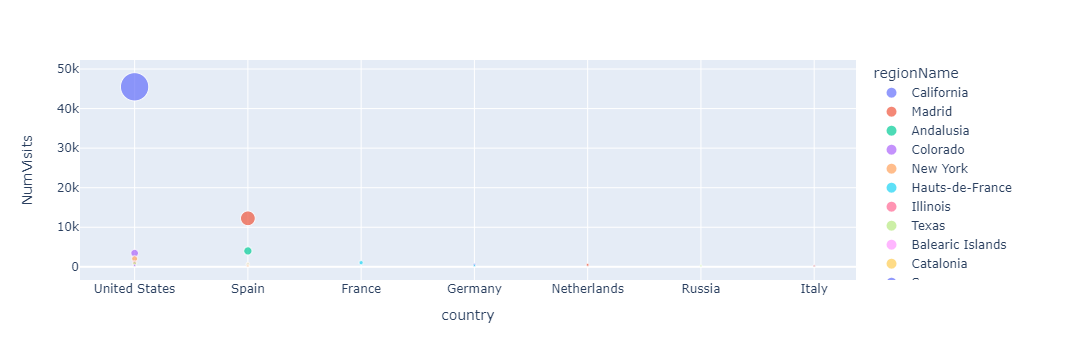

In [272]:
import plotly.express as px
fig= px.scatter(df_geo_NumVisits, x="country", y="NumVisits", animation_group="country",size="NumVisits", color="regionName", hover_name="country")
fig.show()
fig.write_html("Grafico1_Visitas_Country_Region.html")

###### Como se observa en el gráfico dinámico, las ip con mayores accesos o "visitas" se corresponden con United States y Spain, que concentran el 59,60% de las visitas de las ip >200 

In [273]:
dfg_m =pd.DataFrame(df_grafico, columns=["lat","lon"]).copy()
dfg_m.head(5)

,lat,lon
0,37.4220,-122.08400
1,40.5167,-3.66479
2,37.6025,-5.73070
3,39.6663,-104.83430
4,40.4163,-3.69340


##### 3.1.4 Gráfico 2: Localización geográfica de las ip´s con "visitas">200

In [274]:
# importar folio en Python
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.4163,-3.69340],width="%100",height="%100")
location= dfg_m[["lat","lon"]]
#class folium.plugins.MarkerCluster(locations=None, popups=None, icons=None, name=None, overlay=True, control=True, show=True, icon_create_function=None, options=None, **kwargs)
MarkerCluster(location,control=True, Show=True).add_to(m)
m

In [275]:
m.save("Grafico2_Geolocalización_Country_Region.html")

## Nivell 3
### Exercici 3
#### Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.
##### 3.1 Protocolo más común

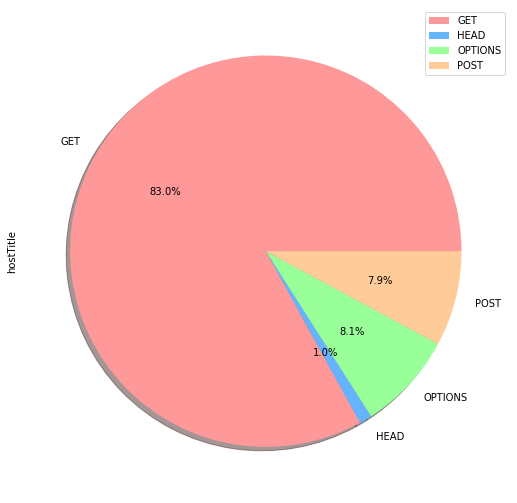

In [276]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
dataRegEx[['request', 'hostTitle']].groupby('request').count().plot(kind='pie', figsize=(9,9), subplots=True, autopct='%1.1f%%',colors=colors,shadow=True);

###### El rpotocolo más común es el GET que supone el 83,01% de los datos informados en el Data Frame original

##### 3.2 Domínio más demandado - Relación entrel el HostTitle y el campo request:

<AxesSubplot:ylabel='hostTitle'>

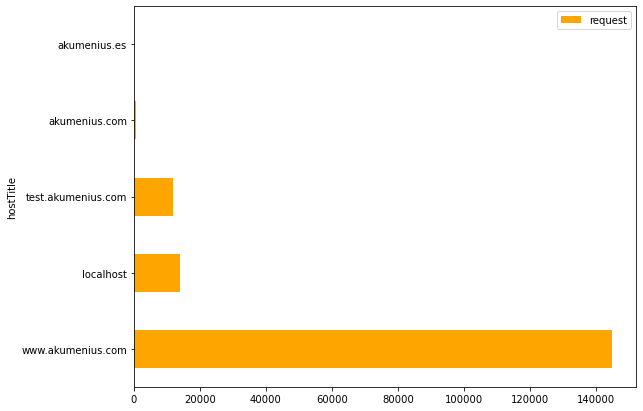

In [277]:
dataRegEx[['hostTitle', 'request']].groupby('hostTitle').count().sort_values(by='request', ascending=False).plot(kind='barh',color = "orange",figsize=(9,7))

##### 3.3 Elementos más solicitados - relación entre requested/request:

In [278]:
dataRequested = dataRegEx[['request', 'requested']]
#dataRequested_ok = dataRequested[(dataRequested["request"] == "GET") & (dataRequested["requested"] != "/")].groupby('requested').count().sort_values(by="request", ascending=False)
dataRequested_ok = dataRequested[dataRequested["requested"] != "*"].groupby('requested').count().sort_values(by="request", ascending=False)
dataRequested_ok.head(10)

,request
requested,
/destinos-get,6818
/,3927
/hotel-list-data/,2093
/hotel-list,1442
/raton-search,1341
/hotels-consulted-update,1007
/icon.png,982
/includes/css/style.css,830
/includes/images/uploaded/logo.png,780


In [279]:
dataRequested_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63454 entries, /destinos-get to /wp/wp-login.php
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   request  63454 non-null  int64
dtypes: int64(1)
memory usage: 991.5+ KB


##### Gráfico 4: Número de request por Requested (los 10 primeros)

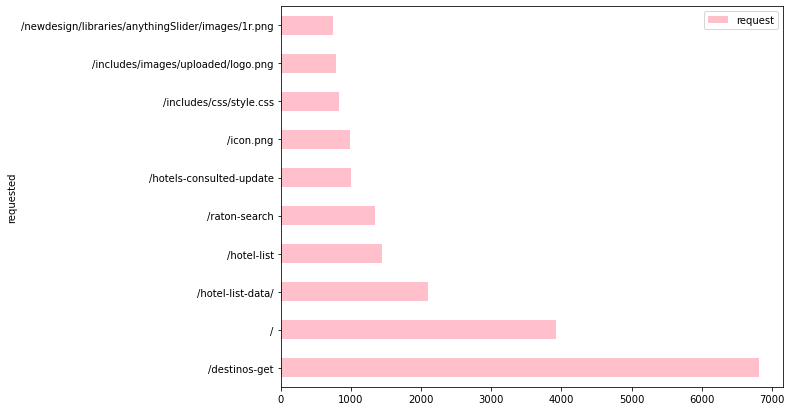

In [280]:
dataRequested_ok.head(10).plot(kind='barh',color="pink" ,figsize=(9,7));